# Polynomial Regression

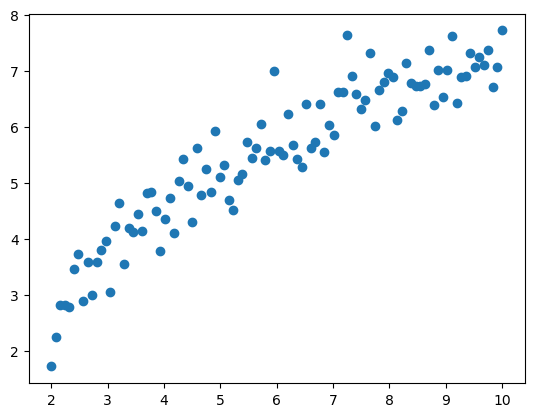

In [197]:
import numpy as  np
import matplotlib.pyplot as plt
from numpy import random

w = [0.4 , 0.002 , 3 ]
x = np.linspace(2 , 10 , 100)
y = w[0] + w[1]*x+w[2]*np.log(x) + np.random.randn(100)*0.43
X = np.array([x,np.log(x)]).T
plt.scatter(x,y)

In [30]:
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

In [31]:
model = LinearRegression()
x_train , x_test , y_train , y_test = train_test_split(X, y ,test_size=0.33, random_state=42)

In [6]:
# x_train = x_train.reshape(-1, 1)  # Ensure x_train has the correct shape
# x_test = x_test.reshape(-1, 1)    # Ensure x_test matches x_train

In [7]:
model = model.fit(x_train , y_train )
model.score(x_test , y_test) 

0.9157227853579119

In [8]:
w = np.array([ model.intercept_ , model.coef_[0] ,model.coef_[1]] )

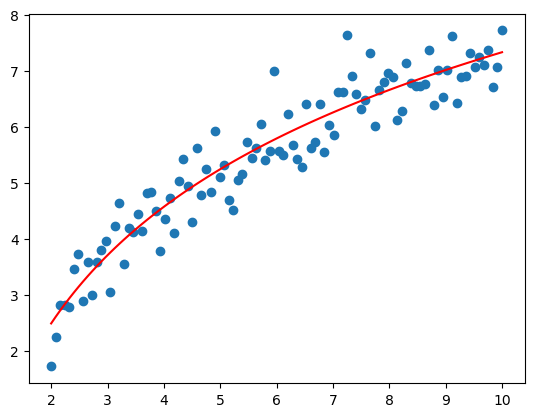

In [199]:
yy = w[0] + w[1]*x +w[2]*np.log(x) 
plt.scatter(x,y)
plt.plot(x , yy , color='red')

In [10]:
t = 6
model.predict([[t , np.log(t)]])

array([5.78492048])

# La regression polynomial

In [202]:
def h(x, w):
    return np.dot(x, w) 

def cout(x, y, w):
    m = x.shape[0] 
    return (1 / (2 * m)) * np.sum((h(x, w) - y) ** 2)


def GradDes(x, y, alpha, itera):
    m = x.shape[0]  # nbr des exemple 
    n = x.shape[1]  # nbr des features
    w = np.zeros(n)   # on initialise w par 0 0 0
    J = []  
    for i in range(itera):
        # Update each wj
        for j in range(n):
            w[j] = w[j] - alpha * (1/m) * np.sum((h(x, w) - y) * x[:, j])
        J.append(cout(x, y, w))
    return w, J

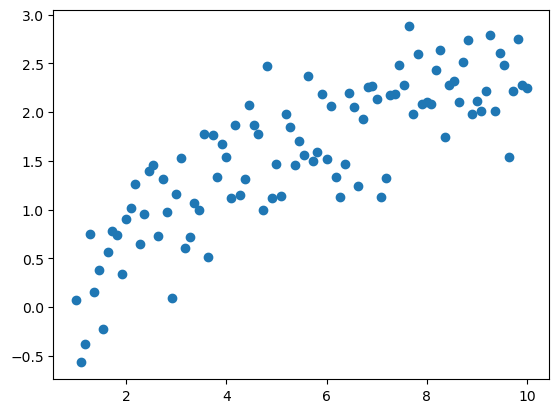

In [203]:
w = [0.1,0.2,3]
x1 = np.linspace(1,10, 100)
x = np.stack((x1 , np.log(x1)),axis=1)

y = 0.02 +x[:,1] + np.random.randn(100)*0.42

plt.scatter(x1,y)

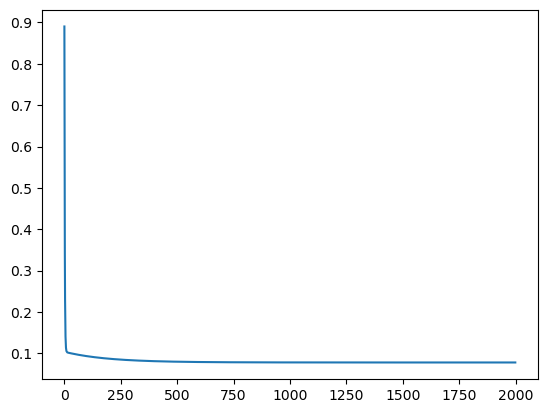

In [205]:
alpha = 0.05
itera = 2000
w , J = GradDes(x ,y , alpha , itera)
y_predict = w[0] + w[1]*x[:,1] 
w

plt.plot(np.arange(len(J)),J)


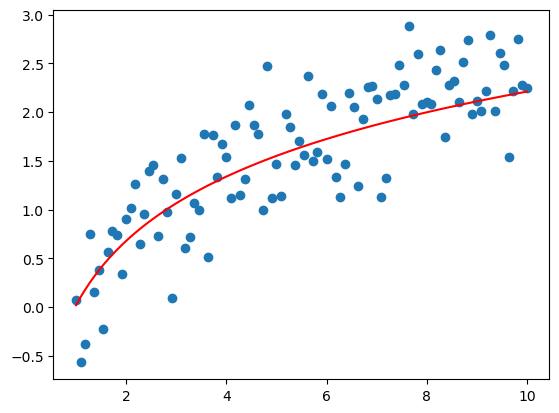

In [206]:

plt.scatter(x1,y)
plt.plot(x1 , y_predict , color="r")

# La Regression Multiple 

In [71]:
def h(x,w):
    return x.dot(w)

def cout(x,y,w):
    return (1/2*x.shape[0]) * ((h(x,w)-y).dot(h(x,w)-y)) 



In [72]:
x = np.array([
    [1, 2, 3],  # Exemple 1 : [bias, x1, x2]
    [1, 3, 5],  # Exemple 2 : [bias, x1, x2]
    [1, 4, 7],  # Exemple 3 : [bias, x1, x2]
              ]) 

y = 3*np.array([2, 4, 5]) + 2 

alpha = 0.0001
itera = 100
w,J = GradDes(x,y , alpha , itera)
w

array([0.10835212, 0.34964883, 0.59038528])

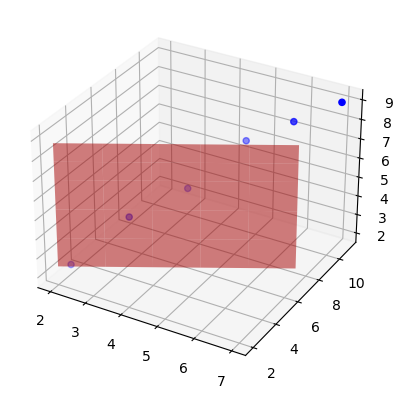

In [61]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D  

def h(x, w):
    return np.dot(x, w) 

def cout(x, y, w):
    m = x.shape[0] 
    return (1 / (2 * m)) * np.sum((h(x, w) - y) ** 2)

def GradDes(x, y, alpha, itera):
    m = x.shape[0]  
    n = x.shape[1]  
    w = np.zeros(n)  
    J = []  
    
    for i in range(itera):
        
        # Update each wj
        for j in range(n):
            w[j] = w[j] - alpha * (1/m) * np.sum((h(x, w) - y) * x[:, j])
        
        J.append(cout(x, y, w))
    return w, J


x = np.array([
    [1, 2, 3],  
    [1, 3, 5],  
    [1, 4, 7],
    [1, 5, 9],
    [1, 6, 10],
    [1, 7, 11]   
])
y = np.array([2, 4, 5, 7 ,8,9]) 


w = np.array([0, 0, 0])

alpha = 0.000182
itera = 1000
w,J = GradDes(x,y , alpha , itera)


# Visualisation en 3D
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

# Tracer les points de data
ax.scatter(x[:, 1], x[:, 2], y, c='b', label='data')

y_pred = w[0] + w[1] * x[:,1] + w[2] * x[:,2]  
y_pred = y_pred.reshape(-1,1)
ax.plot_surface(x[:,1], x[:,1], y_pred, color='red', alpha=0.5)

plt.show()

19.28398477499234 0.040899837619821376


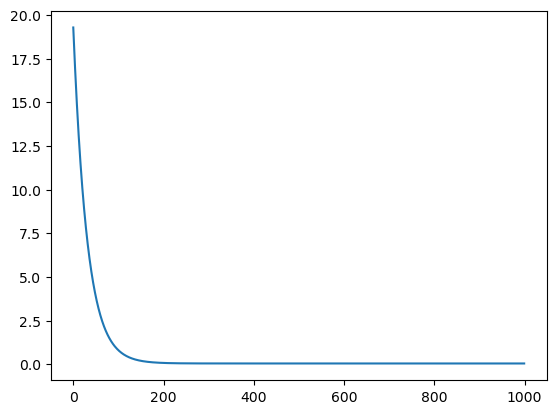

In [15]:
plt.plot(np.arange(itera) , J)
print( J[0],J[-1])

# Houce dataset


In [16]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

In [17]:
df = pd.read_csv("data.csv")
df.head(2)

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated,street,city,statezip,country
0,2014-05-02 00:00:00,313000.0,3.0,1.5,1340,7912,1.5,0,0,3,1340,0,1955,2005,18810 Densmore Ave N,Shoreline,WA 98133,USA
1,2014-05-02 00:00:00,2384000.0,5.0,2.5,3650,9050,2.0,0,4,5,3370,280,1921,0,709 W Blaine St,Seattle,WA 98119,USA


## Cleaning the data

In [18]:
df = df.loc[:,["bedrooms","bathrooms","sqft_living","sqft_lot","floors","waterfront","view","condition","sqft_above","price"]]
df.corr()

,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,price
bedrooms,1.000000,0.545920,0.594884,0.068819,0.177895,-0.003483,0.111028,0.025080,0.484705,0.200336
bathrooms,0.545920,1.000000,0.761154,0.107837,0.486428,0.076232,0.211960,-0.119994,0.689918,0.327110
sqft_living,0.594884,0.761154,1.000000,0.210538,0.344850,0.117616,0.311009,-0.062826,0.876443,0.430410
sqft_lot,0.068819,0.107837,0.210538,1.000000,0.003750,0.017241,0.073907,0.000558,0.216455,0.050451
floors,0.177895,0.486428,0.344850,0.003750,1.000000,0.022024,0.031211,-0.275013,0.522814,0.151461
waterfront,-0.003483,0.076232,0.117616,0.017241,0.022024,1.000000,0.360935,0.000352,0.078911,0.135648
view,0.111028,0.211960,0.311009,0.073907,0.031211,0.360935,1.000000,0.063077,0.174327,0.228504
condition,0.025080,-0.119994,-0.062826,0.000558,-0.275013,0.000352,0.063077,1.000000,-0.178196,0.034915
sqft_above,0.484705,0.689918,0.876443,0.216455,0.522814,0.078911,0.174327,-0.178196,1.000000,0.367570
price,0.200336,0.327110,0.430410,0.050451,0.151461,0.135648,0.228504,0.034915,0.367570,1.000000


In [19]:
data = df.loc[: , ["bedrooms","bathrooms","sqft_living","view","sqft_above","price"]]
data.drop_duplicates()

,bedrooms,bathrooms,sqft_living,view,sqft_above,price
0,3.0,1.50,1340,0,1340,3.130000e+05
1,5.0,2.50,3650,4,3370,2.384000e+06
2,3.0,2.00,1930,0,1930,3.420000e+05
3,3.0,2.25,2000,0,1000,4.200000e+05
4,4.0,2.50,1940,0,1140,5.500000e+05
...,...,...,...,...,...,...
4595,3.0,1.75,1510,0,1510,3.081667e+05
4596,3.0,2.50,1460,0,1460,5.343333e+05
4597,3.0,2.50,3010,0,3010,4.169042e+05
4598,4.0,2.00,2090,0,1070,2.034000e+05


In [20]:
x = data.loc[:,["bedrooms","bathrooms","sqft_living","view","sqft_above"]]
y = data.loc[:,["price"]]

print(x.info())
print("\n")
print(y.info())

In [21]:
x.describe()

,bedrooms,bathrooms,sqft_living,view,sqft_above
count,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000
mean,3.400870,2.160815,2139.346957,0.240652,1827.265435
std,0.908848,0.783781,963.206916,0.778405,862.168977
min,0.000000,0.000000,370.000000,0.000000,370.000000
25%,3.000000,1.750000,1460.000000,0.000000,1190.000000
50%,3.000000,2.250000,1980.000000,0.000000,1590.000000
75%,4.000000,2.500000,2620.000000,0.000000,2300.000000
max,9.000000,8.000000,13540.000000,4.000000,9410.000000


## important
ona les  valeur dans des colonnes 'sqft_living' et 'sqft_above' sont très grand en comparaision avec les autre colonnes alors une normalisation est necessaire.
mais COMMENT?????

sqft_living ET sqft_above ont une fort correlation on va choisir une d'elle qui va represent les deux

In [22]:
x = x.loc[:,["sqft_living","bedrooms","view"]]
y = data.loc[:,["price"]]

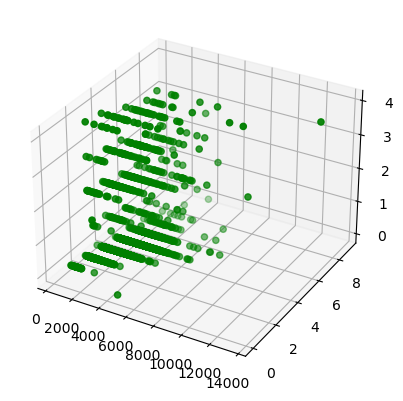

In [23]:
ax = plt.axes(projection='3d')
ax.scatter(x.loc[:,"sqft_living"],x.loc[:,"bedrooms"] ,x.loc[:,"view"], c='green')

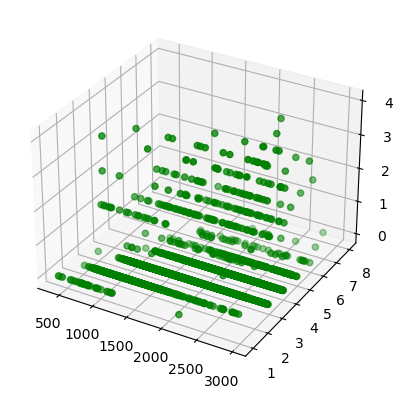

In [24]:
x = x[x.loc[:,"sqft_living"]<3000]
ax = plt.axes(projection='3d')
ax.scatter(x.loc[:,"sqft_living"],x.loc[:,"bedrooms"] ,x.loc[:,"view"], c='green')

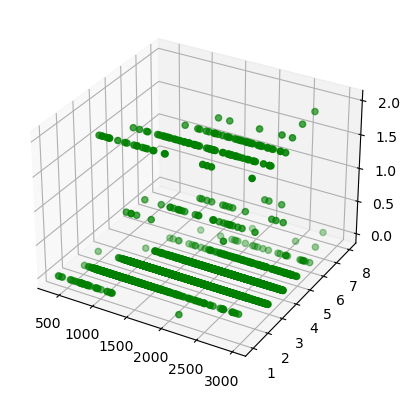

In [25]:
x = x[x.loc[:,"view"]<3]
ax = plt.axes(projection='3d')
ax.scatter(x.loc[:,"sqft_living"],x.loc[:,"bedrooms"] ,x.loc[:,"view"], c='green')

## Training 

In [26]:
data1 = data[data.loc[:,"view"]<3]
data_bon = data1[data1.loc[:,"sqft_living"]<3000]
x = data_bon.loc[:,["sqft_living","bedrooms","view"]]
y = data_bon.loc[:,["price"]]

In [27]:
model = LinearRegression()
x_train ,x_test, y_train,y_test = train_test_split(x,y ,test_size=0.33 , random_state= 42)

In [28]:
model.fit(x_train ,y_train)
model.score(x_test,y_test)

0.23748187516741392

###  we need the Normlisation

#

#

# Breast Cancer

In [23]:
import  numpy as np
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

In [24]:
df = pd.read_csv('Breast_Cancer.csv')
df.head(5)

,Age,Race,Marital Status,T Stage,N Stage,6th Stage,differentiate,Grade,A Stage,Tumor Size,Estrogen Status,Progesterone Status,Regional Node Examined,Reginol Node Positive,Survival Months,Status
0,68,White,Married,T1,N1,IIA,Poorly differentiated,3,Regional,4,Positive,Positive,24,1,60,Alive
1,50,White,Married,T2,N2,IIIA,Moderately differentiated,2,Regional,35,Positive,Positive,14,5,62,Alive
2,58,White,Divorced,T3,N3,IIIC,Moderately differentiated,2,Regional,63,Positive,Positive,14,7,75,Alive
3,58,White,Married,T1,N1,IIA,Poorly differentiated,3,Regional,18,Positive,Positive,2,1,84,Alive
4,47,White,Married,T2,N1,IIB,Poorly differentiated,3,Regional,41,Positive,Positive,3,1,50,Alive


In [25]:
data = df.loc[:,["Age","Race", "Marital Status","differentiate","Grade","Tumor Size" ,"Estrogen Status" ,
                 "Progesterone Status", "Reginol Node Positive",
                 "Survival Months" ,"A Stage", "Status"]]
for col in data.columns:
    print(f"Unique values in {col}:\n", data[col].unique(), "\n")


Unique values in Age:
 [68 50 58 47 51 40 69 46 65 48 62 61 56 43 60 57 55 63 66 53 59 54 49 64
 42 37 67 31 52 33 45 38 39 36 41 44 32 34 35 30] 

Unique values in Race:
 ['White' 'Black' 'Other'] 

Unique values in Marital Status:
 ['Married' 'Divorced' 'Single ' 'Widowed' 'Separated'] 

Unique values in differentiate:
 ['Poorly differentiated' 'Moderately differentiated' 'Well differentiated'
 'Undifferentiated'] 

Unique values in Grade:
 ['3' '2' '1' ' anaplastic; Grade IV'] 

Unique values in Tumor Size:
 [  4  35  63  18  41  20   8  30 103  32  13  59  15  19  46  24  25  29
  40  70  22  50  17  21  10  27  23   5  51   9  55 120  77   2  11  12
  26  75 130  34  80   3  60  14  16  45  36  76  38  49   7  72 100  43
  62  37  68  52  85  57  39  28  48 110  65   6 105 140  42  31  90 108
  98  47  54  61  74  33   1  87  81  58 117  44 123 133  95 107  92  69
  56  82  66  78  97  88  53  83 101  84 115  73 125 104  94  86  64  96
  79  67] 

Unique values in Estrogen Status:

In [26]:
df["Race"] = df["Race"].replace({"White": 1, "Black": 0 ,"Other":2})
df["Marital Status"] = df["Marital Status"].replace( {"Married": 1, "Single ": 0 ,"Divorced":2,"Widowed":0 , "Separated":0})
df["differentiate"] = df["differentiate"].replace({"Poorly differentiated": 0, "Moderately differentiated": 1 ,"Well differentiated":2,"Undifferentiated":3})
df["Grade"] = df["Grade"].replace({"1": 1, "2": 2 ,"3":3," anaplastic; Grade IV":4})
df["Estrogen Status"] = df["Estrogen Status"].replace({"Positive":1,"Negative":0})
df["Progesterone Status"] = df["Progesterone Status"].replace({"Positive":1,"Negative":0})
df["A Stage"] = df["A Stage"].replace({"Regional":1,"Distant":0})
df["Status"] = df["Status"].replace( {"Alive":1,"Dead":0})

data = df.loc[:,["Age", "Race","Marital Status","differentiate","Grade","Tumor Size" ,"Estrogen Status" ,
                 "Progesterone Status", "Reginol Node Positive",
                 "Survival Months" , "A Stage","Status"]]
for col in data.columns:
    print(f"Unique values in {col}: \n", data[col].unique(), "\n") 

Unique values in Age: 
 [68 50 58 47 51 40 69 46 65 48 62 61 56 43 60 57 55 63 66 53 59 54 49 64
 42 37 67 31 52 33 45 38 39 36 41 44 32 34 35 30] 

Unique values in Race: 
 [1 0 2] 

Unique values in Marital Status: 
 [1 2 0] 

Unique values in differentiate: 
 [0 1 2 3] 

Unique values in Grade: 
 [3 2 1 4] 

Unique values in Tumor Size: 
 [  4  35  63  18  41  20   8  30 103  32  13  59  15  19  46  24  25  29
  40  70  22  50  17  21  10  27  23   5  51   9  55 120  77   2  11  12
  26  75 130  34  80   3  60  14  16  45  36  76  38  49   7  72 100  43
  62  37  68  52  85  57  39  28  48 110  65   6 105 140  42  31  90 108
  98  47  54  61  74  33   1  87  81  58 117  44 123 133  95 107  92  69
  56  82  66  78  97  88  53  83 101  84 115  73 125 104  94  86  64  96
  79  67] 

Unique values in Estrogen Status: 
 [1 0] 

Unique values in Progesterone Status: 
 [1 0] 

Unique values in Reginol Node Positive: 
 [ 1  5  7  2 18 12  3 14 22 17 23  4 10  6  9  8 20 16 13 11 24 27 21 26

In [27]:
data.dropna(inplace=True)
data.drop_duplicates(inplace=True)
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4019 entries, 0 to 4023
Data columns (total 12 columns):
 #   Column                 Non-Null Count  Dtype
---  ------                 --------------  -----
 0   Age                    4019 non-null   int64
 1   Race                   4019 non-null   int64
 2   Marital Status         4019 non-null   int64
 3   differentiate          4019 non-null   int64
 4   Grade                  4019 non-null   int64
 5   Tumor Size             4019 non-null   int64
 6   Estrogen Status        4019 non-null   int64
 7   Progesterone Status    4019 non-null   int64
 8   Reginol Node Positive  4019 non-null   int64
 9   Survival Months        4019 non-null   int64
 10  A Stage                4019 non-null   int64
 11  Status                 4019 non-null   int64
dtypes: int64(12)
memory usage: 408.2 KB


In [28]:
data.corr()

,Age,Race,Marital Status,differentiate,Grade,Tumor Size,Estrogen Status,Progesterone Status,Reginol Node Positive,Survival Months,A Stage,Status
Age,1.000000,-0.029056,0.011889,0.093210,-0.099284,-0.076932,0.059713,-0.021446,0.012819,-0.009007,0.020812,-0.056102
Race,-0.029056,1.000000,0.083973,0.032617,-0.045379,0.004612,0.020281,0.018595,-0.007705,0.055091,0.007101,0.078743
Marital Status,0.011889,0.083973,1.000000,-0.011431,0.000522,0.000298,0.025223,0.009064,0.005840,0.019718,-0.003927,0.018319
differentiate,0.093210,0.032617,-0.011431,1.000000,-0.908227,-0.099055,0.186683,0.175616,-0.122613,0.058396,0.043621,0.133967
Grade,-0.099284,-0.045379,0.000522,-0.908227,1.000000,0.118869,-0.211169,-0.179648,0.134987,-0.067674,-0.039372,-0.161195
Tumor Size,-0.076932,0.004612,0.000298,-0.099055,0.118869,1.000000,-0.059338,-0.069448,0.241850,-0.087217,-0.123782,-0.133842
Estrogen Status,0.059713,0.020281,0.025223,0.186683,-0.211169,-0.059338,1.000000,0.513245,-0.085804,0.128584,0.065523,0.184538
Progesterone Status,-0.021446,0.018595,0.009064,0.175616,-0.179648,-0.069448,0.513245,1.000000,-0.077745,0.096198,0.026446,0.176880
Reginol Node Positive,0.012819,-0.007705,0.005840,-0.122613,0.134987,0.241850,-0.085804,-0.077745,1.000000,-0.135473,-0.232790,-0.256401
Survival Months,-0.009007,0.055091,0.019718,0.058396,-0.067674,-0.087217,0.128584,0.096198,-0.135473,1.000000,0.070172,0.476786


<Axes: >

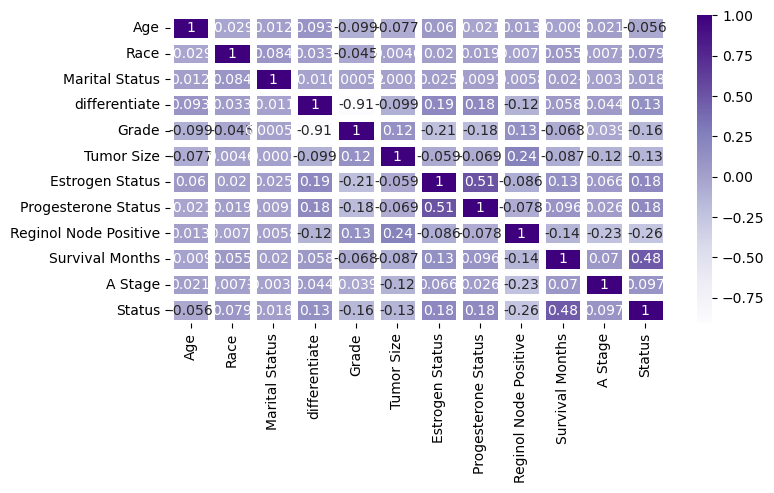

In [29]:
import matplotlib.pyplot as plt 
import seaborn as sns

# heatmap
plt.figure(figsize=(8,4))
sns.heatmap(data.corr(), annot=True,linewidths=5, cmap="Purples")

In [30]:
# modifying depend to the correlation
data = df.loc[:,["Age","Race","Grade","Tumor Size","Estrogen Status" ,"Progesterone Status", "Reginol Node Positive", "Survival Months" ,"A Stage" ,"Status"]]
model = LinearRegression()
x = data.iloc[:,:-1]
y = data.iloc[:,-1]

x_train , x_test , y_train , y_test = train_test_split(x,y ,test_size=0.20 , random_state=42)


model.fit(x_train , y_train)
model.score(x_test,y_test)

0.3569086781562518

In [31]:
print("shape of y  ",y_train.shape)
print("shape of x  ",x_train.shape)
y_pred = model.predict(x_test)

shape of y   (3219,)
shape of x   (3219, 9)


In [32]:
from sklearn.metrics import accuracy_score

accuracy_score(y_test , y_pred.round())

0.893167701863354

In [33]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
#  what the hell  waaaaaaaaaa
# Evaluate the model
mae = mean_absolute_error(y_test, y_pred)  # Mean Absolute Error
mse = mean_squared_error(y_test, y_pred)  # Mean Squared Error
rmse = np.sqrt(mse)  # Root Mean Squared Error
r2 = r2_score(y_test, y_pred)  # R-squared
r2

0.3569086781562518